### Treść zadania

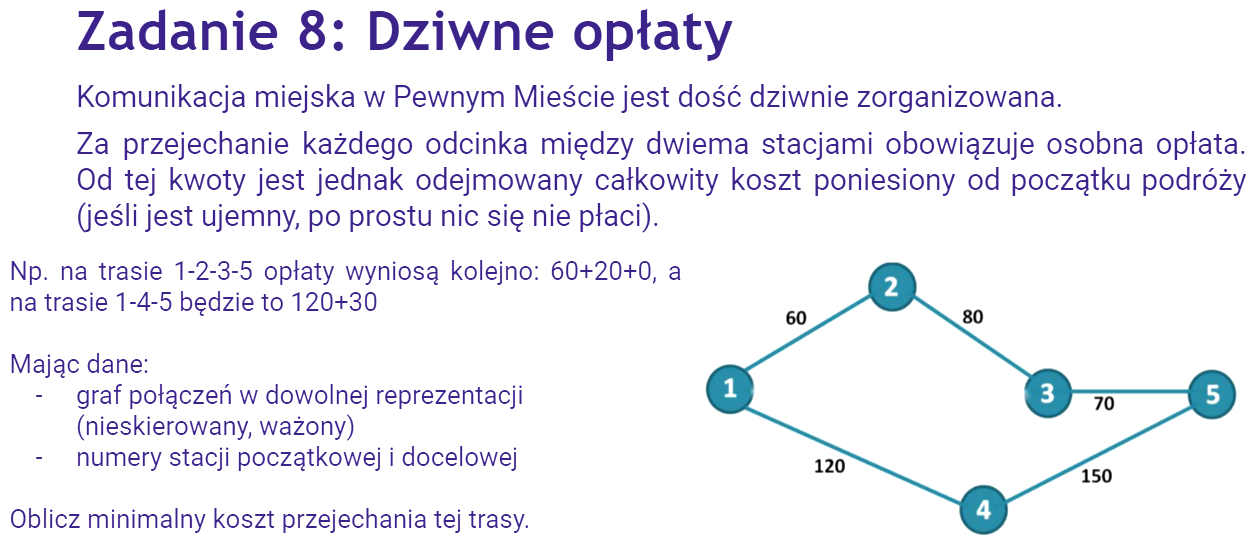

### Omówienie algorytmu

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $
###### Pamięciowa:
$ O(V) $ - na wejściu mamy dany graf

### Implementacja #1 (wraz z odtwarzaniem trasy)
##### (Jeżeli graf jest w reprezentacji listowej)

In [1]:
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        total_cost, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if total_cost < weights[u]:
            weights[u] = total_cost
            parents[u] = parent
            # Break if reached a target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((max(weight, total_cost), v, u))
                
    return parents, weights


def get_shortest_path(parents, t: 'target'):
    n = len(G)
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def min_cost(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    parents, weights = dijkstra(G, s, t)
    print(parents)
    return weights[t], get_shortest_path(parents, t)

###### Kilka testów

##### Pomocnicze:

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

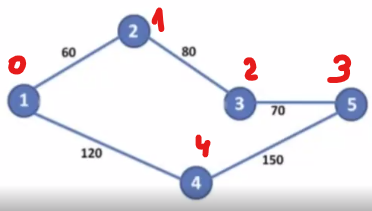

In [3]:
E = [(0, 1, 60), (1, 2, 80), (2, 3, 70), (3, 4, 150), (0, 4, 120)]
G = undirected_weighted_graph_list(E)

s = 0
t = 3

print(min_cost(G, s, t))

[None, 0, 1, 2, None]
(80, [0, 1, 2, 3])


In [4]:
s = 3
t = 4

print(min_cost(G, s, t))

[1, 2, 3, None, 0]
(120, [3, 2, 1, 0, 4])


### Implementacja #2 (wraz z odtwarzaniem trasy)
##### (Jeżeli graf jest w reprezentacji macierzowej)

In [5]:
class Node:
    def __init__(self, idx=None):
        self.idx  = idx
        self.next = None


def vertices_to_process_ll(n):
    head = Node()
    tail = head
    for i in range(n):
        tail.next = Node(i)
        tail = tail.next
    return head


def get_min_weight_vertex(head, weights):
    if not head.next: return None  # If no more vertices are remaining
    
    # Find a vertex of the lowest weight
    min_prev = head
    prev = head.next
    while prev.next:
        if weights[prev.next.idx] < weights[min_prev.next.idx]:
            min_prev = prev
        prev = prev.next
        
    # Remove a vertex found
    u = min_prev.next.idx
    min_prev.next = min_prev.next.next
    
    return u


def dijkstra(G: 'graph represented by adjacency matrix', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    # Store information about vertices which haven't been processed yet
    to_process = vertices_to_process_ll(n)
    parents    = [None] * n
    weights    = [inf] * n
    weights[s] = 0
    
    # Loop till there are some vertices which haven't been processed yet
    while True:
        # Find a vertex of the minimum total weight path
        u = get_min_weight_vertex(to_process, weights)
        # Break if the next vertex to process is the target vertex as we have 
        # already found a shortest path to this vertex before
        if u == t: break
        # Iterate over the vertice's neighbours and update weights of the paths
        for v in range(n):
            # Skip if no edge (-1 means not edge)
            if G[u][v] == -1: continue
            # Update the weight of a path to the vertex v if found a better one
            curr_cost = max(weights[u], G[u][v])
            if curr_cost < weights[v]:
                weights[v] = curr_cost
                parents[v] = u
                
    return parents, weights


def get_shortest_path(parents, t: 'target'):
    n = len(G)
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    return path


def min_cost(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    parents, weights = dijkstra(G, s, t)
    print(parents)
    return weights[t], get_shortest_path(parents, t)

###### Kilka testów

##### Pomocnicze:

In [6]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[-1] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G

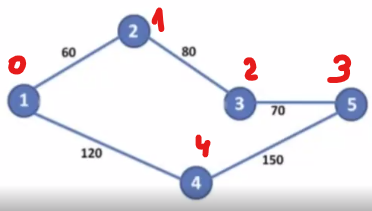

In [7]:
E = [(0, 1, 60), (1, 2, 80), (2, 3, 70), (3, 4, 150), (0, 4, 120)]
G = undirected_weighted_graph_matrix(E)

s = 0
t = 3

print(min_cost(G, s, t))

[None, 0, 1, 2, 0]
(80, [0, 1, 2, 3])


In [8]:
s = 3
t = 4

print(min_cost(G, s, t))

[1, 2, 3, None, 0]
(120, [3, 2, 1, 0, 4])
